[View in Colaboratory](https://colab.research.google.com/github/raahatg21/Cats-and-Dogs-Dataset-with-Keras/blob/master/Cats_Dogs_4.ipynb)

# Cats vs Dogs: Binary Classification

**Using Pretrained VGG16 Model with Data Augmentation and Fine Tuning. 94% Validation Accuracy. 94.39% Testing Accuracy.**

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Making Google Colab use the Drive files

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmprshmddq8/pubring.gpg' created
gpg: /tmp/tmprshmddq8/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
!ls

adc.json  datalab  drive  sample_data


In [0]:
train_dir = 'drive/cats_and_dogs_small/train'
val_dir = 'drive/cats_and_dogs_small/validation'
test_dir = 'drive/cats_and_dogs_small/test'

In [7]:
# Extracting the Pre-trained Model

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 4s 0us/step


In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
# Extending this model

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False

In [0]:
# Compiling the Model

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])

In [13]:
# Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Training the Model

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = val_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 1335s 13s/step - loss: 0.5894 - acc: 0.7020 - val_loss: 0.4531 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 45s 447ms/step - loss: 0.4772 - acc: 0.7925 - val_loss: 0.3871 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 45s 448ms/step - loss: 0.4373 - acc: 0.8110 - val_loss: 0.3290 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 45s 450ms/step - loss: 0.4075 - acc: 0.8235 - val_loss: 0.3053 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 45s 450ms/step - loss: 0.3844 - acc: 0.8310 - val_loss: 0.3088 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 45s 455ms/step - loss: 0.3706 - acc: 0.8405 - val_loss: 0.2821 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 44s 441ms/step - loss: 0.3625 - acc: 0.8445 - val_loss: 0.2711 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 4

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

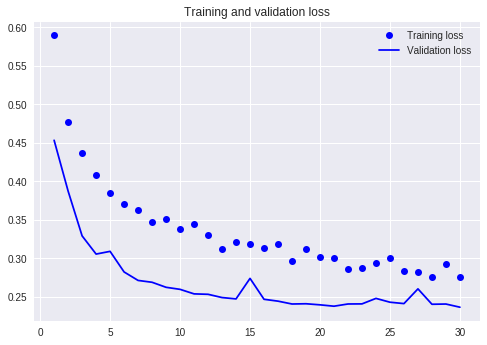

In [16]:
epochs = range(1, 31)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

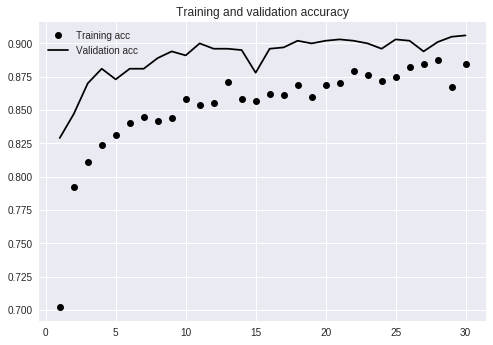

In [17]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [0]:
# Unfreezing the final Conv Block

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
# Again compiling the Model

model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['acc'])

In [20]:
# Training

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = val_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 47s 474ms/step - loss: 0.3032 - acc: 0.8635 - val_loss: 0.2175 - val_acc: 0.9140
Epoch 2/30
100/100 [==============================] - 44s 443ms/step - loss: 0.2562 - acc: 0.8930 - val_loss: 0.2238 - val_acc: 0.9140
Epoch 3/30
100/100 [==============================] - 44s 443ms/step - loss: 0.2302 - acc: 0.9020 - val_loss: 0.2124 - val_acc: 0.9180
Epoch 4/30
100/100 [==============================] - 44s 444ms/step - loss: 0.2078 - acc: 0.9155 - val_loss: 0.2005 - val_acc: 0.9200
Epoch 5/30
100/100 [==============================] - 44s 443ms/step - loss: 0.1949 - acc: 0.9210 - val_loss: 0.2363 - val_acc: 0.9140
Epoch 6/30
100/100 [==============================] - 44s 443ms/step - loss: 0.2020 - acc: 0.9095 - val_loss: 0.2009 - val_acc: 0.9230
Epoch 7/30
100/100 [==============================] - 45s 447ms/step - loss: 0.1802 - acc: 0.9215 - val_loss: 0.2017 - val_acc: 0.9240
Epoch 8/30
100/100 [==============================] - 4

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

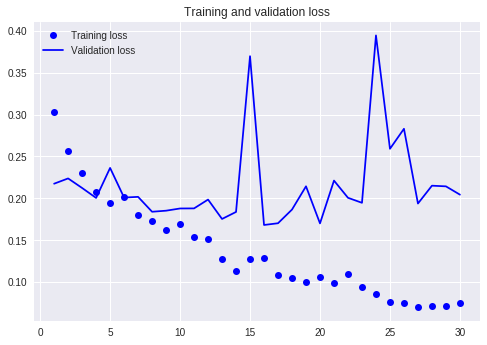

In [22]:
epochs = range(1, 31)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

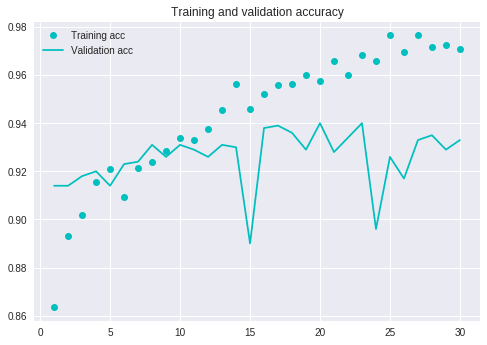

In [23]:
plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'c', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [24]:
# Testing

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
test_loss, test_acc

Found 1007 images belonging to 2 classes.


(0.2140047448920086, 0.9439999914169311)